# Measuring the floating point performance of your machine

Matrix-Matrix multiplication is often used to benchmark machines because the mathematics is such that it is one of the few operations where one can obtain close to theoretical peak performance in pratice.

The number of floating point operations(Flops) in a Matrix-Matrix multiplication of two $N$ x $N$ matrices is given by $2N^3-N^2$ (See http://www2.hawaii.edu/~norbert/CompPhys/compphysicsch10.html for details of how this was determined).

For this benchmark, we construct two random $N$ x $N$ matrices and time how long it takes to multiply them together, $t$. We then compute the number of Gigaflops/s exhibited by that operation via $\frac{2N^3-N^2}{t*10^9}$. We do this several times for any given $N$ and record the average and the best (peak) results obtained.  $N$ is then varied from 250 to 10,000 in steps of 250 to see how performance varies with matrix size.  Usually, the highest performance is obtained by multiplying large matrices together.

For highest performance, you should use a version of numpy that has been linked against a high performance BLAS library such as [OpenBLAS](http://www.openblas.net/) or the Intel MKL(https://software.intel.com/en-us/intel-mkl). The [Anaconda Python](https://www.continuum.io/downloads) distribution includes the Intel MKL by default on Windows and Linux (Mac includes its own high performance BLAS library).

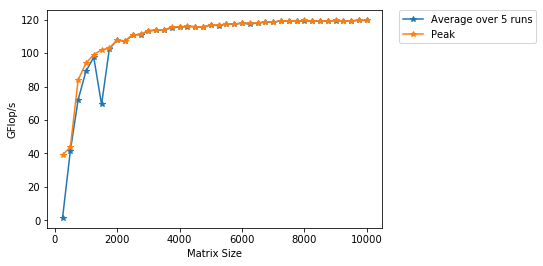

In [1]:
import timeit
import matplotlib.pyplot as plt

def bench_mmm(startn,maxn,step,loops):
    count=0
    
    #Preallocate results lists
    avg_gflops = int((1+(maxn-startn)/step))*[0] 
    peak_gflops = int((1+(maxn-startn)/step))*[0]
    raw_times = [int(loops)*[0] for i in range(int(1+(maxn-startn)/step))]
    all_gflops = [int(loops)*[0] for i in  range(int(1+(maxn-startn)/step))]
    mat_size=int((1+(maxn-startn)/step))*[0] 

    for n in range(startn,maxn+step,step):
        setup_string = "from pylab import rand,dot;n=%d;a=rand(n,n);b=rand(n,n)" % n
        time_list = timeit.repeat("a.dot(b)", setup=setup_string, repeat=loops,number=1)
        raw_times[count] = time_list
        total_time = sum(time_list)
        avg_time = total_time / loops
        peak_time = min(time_list)
        num_ops = 2*n**3-n**2
        avg_gflops[count] = (num_ops/avg_time)/10**9
        peak_gflops[count] = (num_ops/peak_time)/10**9
        all_gflops[count] = [(num_ops/time)/10**9 for time in raw_times[count]]        
        mat_size[count] = n
        count=count+1
    
    plt.plot(mat_size,avg_gflops,'*-',label="Average over %d runs" %loops)
    plt.plot(mat_size,peak_gflops,'*-',label="Peak")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Matrix Size');
    plt.ylabel('GFlop/s');
    plt.show()
    
    return(max(peak_gflops),raw_times,all_gflops)

peak_flops = bench_mmm(250,10000,250,5)

In [2]:
#Maximum flops found
result1=peak_flops[0]

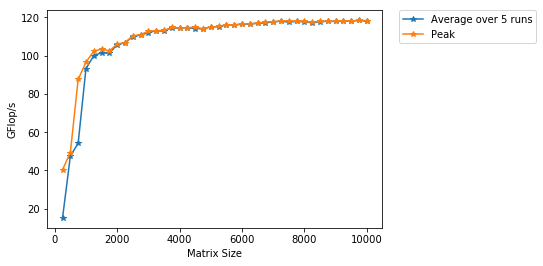

In [3]:
#Run it again
peak_flops = bench_mmm(250,10000,250,5)

In [4]:
result2=peak_flops[0]

In [5]:
#CPU and host info. Most of this cell only works on Linux
import multiprocessing
print('CPUS available = {0}'.format(multiprocessing.cpu_count()))
!hostname
!cat /proc/cpuinfo | grep 'model name' | uniq
!echo "OMP_NUM_THREADS=$OMP_NUM_THREADS"
print('Measured peak speed = {0} Gigaflops'.format(max(result1,result2)))

CPUS available = 12
node006
model name	: Intel(R) Xeon(R) CPU           X5650  @ 2.67GHz
OMP_NUM_THREADS=
Measured peak speed = 119.63435551272401 Gigaflops
